# SOLID Principles
---

>「我们可以用大量精心制作的砖块来制造垃圾」- Robert C. Martin

那当我们有了精心制作的砖块，我们又该何去何从？这就是我们这系列文章的主题，SOLID 原则。

SOLID 原则告诉我们，该如何将我们的 data 与 Function 安排到类别中，以及这些类别该如何相互关联。

这里的类别是泛指任何 data 与 Function 的集合，而不只是单指 OO 类别的软件架构。在网络上有很多讲 SOLID 原则的文章，但很少有指出「类别」的到底是指什么，很多人也会误会「类别」是真的指 OO 的 Class ，但实则并非如此！

> 在 Clean Architecture 书中有提到，SOLID 原则目标是创建中层级的软件结构，而「中层级」是指这些原则是程序師在模块层级工作时应用的原则。它们应用在程序码层级之上，并且有助于定义模块和组件内使用的软件结构类型。


这「中层级」就是我们上文说到的「类别」，是 data 与 function 的集合。所以是在程序码层级之上，如 OO 中的类别(不是代码里的class)就是一个中层级模块。而SOLID 原则就是为他们而服务，让我们可以透过这些原则写出能容忍变化、易于理解，且能被模块使用的良好「地基」。

Object-Oriented Design includes these five principles:

- S – Single Responsibility Principle (SRP)
- O – Open-Close Principle (OCP)
- L – Liskov Substitution Principle (LSP)
- I – Interface Segregation Principle (ISP)
- D – Dependency Inversion Principle (DIP)


## 1. Single Responsibility Principle
---

嗯.. 这真的是一个是一个害死人的名称，很多人会以为他意味每个模块都应该只做一件事

这句话可也是害人匪浅, "every class should have only one reason to change". 我也被误导了...

按照惯例，先上定义：“A class should have only one reason to change.” 翻译成中文是：「一个模块应有且只有一个理由会使其改变。」

> 在 Clear Architecture 一书中，作者说到软件系统改变是为了满足用户与利益相关者，所以我们应该把这理由套用到定义上，即变成：
「一个模块应只对唯一一个用户或利益相关者负责。」

可是如果现在有多个用户或利益相关者希望以相同的方式改变的话，我们不就会轻易地违反定义了吗？

所以我们需要为一群希望以相同的方式改变的用户或利益相关者一个定义，在这边作者称之为角色。

最终定义为：「一个模块应只对唯一的一个角色负责。」

对，疑问来了，角色是什么？这样做的好处是什么？违反这原则会带来什么坏处？

### 例子
为 calcCreditCardFee() 分别封装起来，以应对不同的角色. OK，这样我们 10 个角色用到很类似的计算 function，我们就要 10 个 class，然后 class 里面的 function 都只有点一差异，这样好像又有点怪怪的？
```java
class SalesFeeCalculator {      // for 卖家
    public function calcTax();
    public function calcCreditCardFee();
}
class AdminFeeCalculator {      // for 后台
    public function calcTax();
    public function calcCreditCardFee();
}
```

那如果是透过控件来管理呢？

```java
class FeeCalculator {
private role = null;
    
    public __construct(Role role) {
        this.role = role
    }
 
    public function calcTax();
public function calcCreditCardFee() {
        if (this.role == Sales) {
            return ....;
        }else if (this.role == Admin){
            return ....;
        }else{
            return ....;
        }
    }
}
```

这样的类别虽然可以保持简洁，我们又要面对在一个类别中会同时面向两个角色的问题。

往更小的分类方向去看，我们会发现一直会改变的是 calcCreditCardFee() 这个方法。如果我们把 calcCreditCardFee() 抽出来独立使用呢？

```java
interface FeeCalculator {
    public function calc();
}

class CreditCardFeeHandler implements FeeCalculator {
    public function calc(percentage) {
        return ....;
    }
}
class TaxFeeHandler implements FeeCalculator {
    public function calc(percentage) {
        return ....;
    }
}
```

我们把 `calcCreditCardFee()` 变为 `CreditCardFeeHandler` 类别，再在里面创建一个 `calc()` 方法。这样我们不管是那位用户要使用计算信用卡手续费，只要透过 `CreditCardFeeHandler` 就可以实例化它的计算方法出来。

另外，可以看到我们使用了 `interface` 并分别实作到 `CreditCardFeeHandler` 与 `TaxFeeHandler` 上。这样我们的计算类别都可以有效解耦，而且在要注入的情况时，又可以获得多态的好处。

总结一下，角色就是一群会使用该模块的用户，可能是真的人，也可能是别的模块。所以我们在考虑模块映射的角色时，可以从模块会被谁使用出发。而这样做的好处就是可以「分开不同角色所依赖的程序码」，从而减少不同模块因过度耦合而在改变时所造成的错误，同时亦可以更容易的进行测试。


[原文](https://medium.com/@ChunYeung/%E4%BD%BF%E4%BA%BA%E7%98%8B%E7%8B%82%E7%9A%84-solid-%E5%8E%9F%E5%89%87-%E5%96%AE%E4%B8%80%E8%81%B7%E8%B2%AC%E5%8E%9F%E5%89%87-single-responsibility-principle-c2c4bd9b4e79)

## 解耦 Decoupling 
---
在软件工程中，对象之间的耦合度就是对象之间的依赖性。对象之间的耦合越高，维护成本越高，因此对象的设计应使类和构件之间的耦合最小。

假设生产者和消费者分别是两个类。如果让生产者直接调用消费者的某个方法，那么生产者对于消费者就会产生依赖（也就是耦合）。将来如果消费者的代码发生变化，可能会影响到生产者。而如果两者都依赖于某个缓冲区，两者之间不直接依赖，耦合也就相应降低了。生产者直接调用消费者的某个方法，还有另一个弊端。由于函数调用是同步的（或者叫阻塞的），在消费者的方法没有返回之前，生产者只好一直等在那边。万一消费者处理数据很慢，生产者就会白白糟蹋大好时光。缓冲区还有另一个好处。如果制造数据的速度时快时慢，缓冲区的好处就体现出来了。当数据制造快的时候，消费者来不及处理，未处理的数据可以暂时存在缓冲区中。等生产者的制造速度慢下来，消费者再慢慢处理掉。

因为太抽象，看过网上的说明之后，通过我的理解，我举了个例子：吃包子。

假如你非常喜欢吃包子（吃起来根本停不下来），今天，你妈妈（生产者）在蒸包子，厨房有张桌子（缓冲区），你妈妈将蒸熟的包子盛在盘子（消息）里，然后放到桌子上，你正在看巴西奥运会，看到蒸熟的包子放在厨房桌子上的盘子里，你就把盘子取走，一边吃包子一边看奥运。在这个过程中，你和你妈妈使用同一个桌子放置盘子和取走盘子，这里桌子就是一个共享对象。生产者添加食物，消费者取走食物。桌子的好处是，你妈妈不用直接把盘子给你，只是负责把包子装在盘子里放到桌子上，如果桌子满了，就不再放了，等待。而且生产者还有其他事情要做，消费者吃包子比较慢，生产者不能一直等消费者吃完包子把盘子放回去再去生产，因为吃包子的人有很多，如果这期间你好朋友来了，和你一起吃包子，生产者不用关注是哪个消费者去桌子上拿盘子，而消费者只去关注桌子上有没有放盘子，如果有，就端过来吃盘子中的包子，没有的话就等待。

## 2. Open–Closed Principle
---

The open-closed principle states that software entities should be open for extension, but closed for modification.

当年他们会提出这样的原则是有理由的，比如说 Linux Kernel，他们尽量不希望在为一个稳定的 Linux Kernel 版本添加功能时，因为会改动到原有的程序码而使 Kernel 也要做出大量的修改了，然后出现很多新的 Bug。而是希望在添加功能时，原有稳定的版本还是保持一致，否则 debug 起来就是地狱。

我们可以看到最美妙地遵守 OCP 的几个常用程式，如 Google Chrome、VSCode等等。我们可以轻易为他们添加很多的 plugin，且不会对原来的主体造成影响。

那怎样才能达成 OCP？简单来说，透过 SRP 我们可以就不同因素而改变的模块分类好，再透过 DIP (依赖反向，之后的文章我们会更详细的说到)来为系统创建一个单向依赖的流程。

具体来说， 我们在说架构时都会把程式分成很多层。而在系统中的最高层，通常都是业务逻辑层，其他层次都是围绕着业务逻辑层而进行分工。而这种分工比较像以下的架构图：

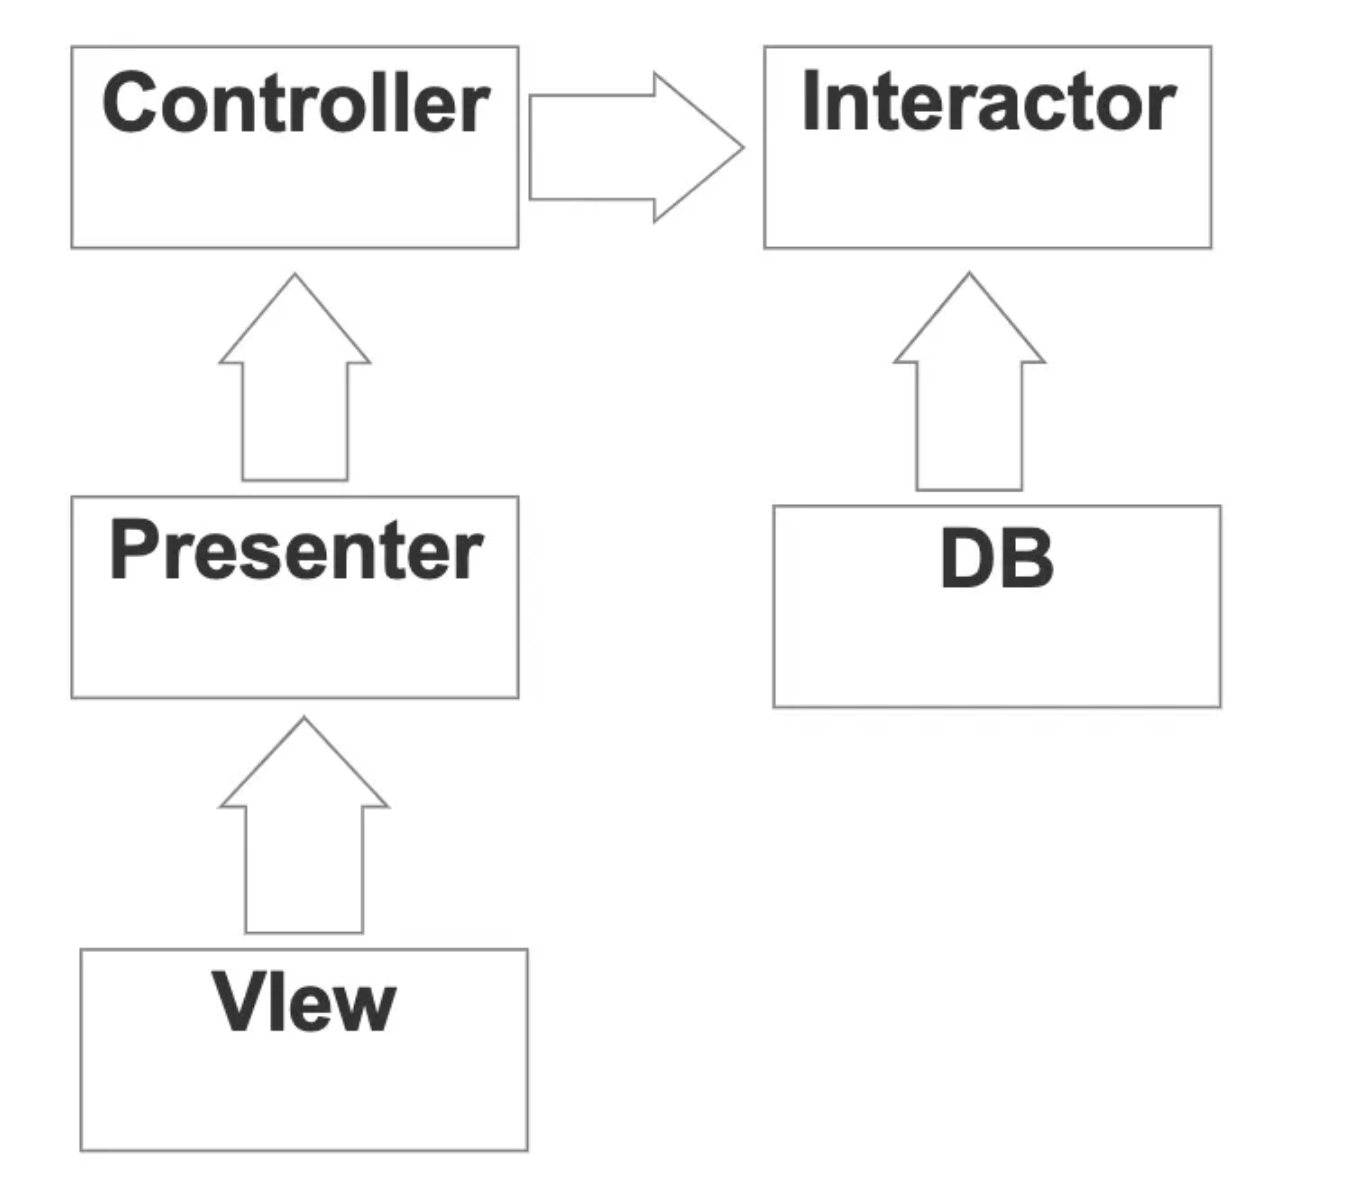

在上图中，整个架构的内核是 Interactor (业务逻辑层)，他会被 Controller 与 DB 所依赖。而 Presenter 又会依赖于 Controller 。

> 这层层的**单向依赖**有效于解耦。

在软件设计中，组件不应依赖于不会直接使用到的东西，如 Interactor(业务逻辑层) 不会直接使用到 View， Interactor 跟 View 之间当然不应有着依赖的关系。同理地，作为底层的组件只需做好自己的「本份」，如 View 就应该是只处理视图的逻辑，不应也不需要知道 Presenter 是在处理什么逻辑，这样的单向依赖可以让高层组件免受非有依赖关系的低层组件改变影响。

说了这么多，OCP 不是要告诉我们程式该怎么分层、工作该怎么写好，而是给出一个解耦的概念，我们应该要朝着就算加了三四五六七个新的功能，我们还是不会影响到原有的程式，更能优雅地设计着！

优雅地设计一个「即使需要功能扩充，亦不需要修改原程序码的系统」。而这样的目标就有赖于我们怎么样设计我们的程式架构了！

## 3. Dependency Inversion Principle
---

Entities must depend on abstractions, not on concretions. It states that the high-level module must not depend on the low-level module, but they should depend on abstractions. 即体现了interface的作用. 

> 高层模块不应依赖低层模块，它们都应依赖于抽象接口。抽象接口不应该依赖于具体实作，具体实作应依赖抽象接口。

了解更多: https://medium.com/程式愛好者/使人瘋狂的-solid-原則-依賴反向原則-dependency-inversion-principle-a74ca045d776


## 4. Liskov Substitution Principle (LSP)
---

> 子型态必须遵从父型态的行为进行设计。

继承请不要随意使用。因为继承是依赖性超强的一个特性，如果稍有一项没有做对，你的子类就会做出超乎预期的行为，在整个系统已经建构起来后，修改起来会是一程地狱之旅。

了解更多: https://medium.com/程式愛好者/使人瘋狂的-solid-原則-里氏替換原則-liskov-substitution-principle-e66659344aed

## 5. Interface Segregation Principle
---

> 定义：No client should be forced to depend on methods it does not use.       
白话翻译：模块与模块之间的依赖，不应有用不到的功能可以被对方调用。

了解更多: https://medium.com/程式愛好者/使人瘋狂的-solid-原則-介面隔離原則-interface-segregation-principle-50f54473c79e